#### Input

In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers import plot_class
from helpers import helpfunction as helper
import numu_selection_helper as numu_helper

In [2]:
# Matplotlib help
plt.rcParams.update({"axes.titlesize": "medium"})
plt_h = 4.65


def get_fig(ncols, nleg):
    fig, ax = plt.subplots(
        ncols=ncols,
        nrows=2,
        figsize=(3.5 * ncols + 2 * nleg, plt_h),
        gridspec_kw={"height_ratios": [3, 1]},
        constrained_layout=True,
        squeeze=False
    )
    return fig, ax

#### Constants

In [3]:
write_pickle = False
input_dir = "/home/nic/Desktop/MicroBooNE/bnb_nue_analysis/wvdp/"
output_dir = "/home/nic/Dropbox/MicroBooNE/_fig/numuCC_exclusive/"
plot_samples = {"dirt", "on", "off", "nu"}

In [4]:
if write_pickle:
    # Load Samples, takes a minute or two
    numu_helper.CreateAfterTraining(plot_samples, input_dir, one_file=True)

In [5]:
sideband = False
run12 = False
run3 = False
fake = False

pot_dict = {}
master_query = "optical_filter"
title_str = ''

if not run12 + run3 + sideband + fake:
    full_sample = True
    print('Unblinded sample')
    beam_on = "on"
    pot_dict['EXT'] = helper.pot_dict['ext']
    
elif (run12 + run3 + sideband)==1:
    full_sample = False
    title_str = r"Reconstructed $\nu_e$ Energy > 0.9 GeV"
    plt_h = 4.85 # slightly higher plots when title is 2 lines
    beam_on = 'sideband'
    master_query = (
        "reco_e>0.9"
    )
    if run12:
        pot_dict = helper.pot_dict['sideband12']
        pot_dict['EXT'] = helper.pot_dict['ext12']
        master_query+= ' & (Run<3 | (sample!=2 & sample!=9))'
        
    elif run3:
        pot_dict = helper.pot_dict['sideband3']
        pot_dict['EXT'] = helper.pot_dict['ext3']
        master_query+= ' & (Run==3 | (sample!=2 & sample!=9))'
    elif sideband:
        pot_dict = helper.pot_dict['sideband']
        pot_dict['EXT'] = helper.pot_dict['ext']
    else:
        print('Not possible!')
elif fake:
    full_sample = True
    title_str = r"Fake data-set 1"
    plt_h = 4.85 # slightly higher plots when title is 2 lines
    beam_on = 'fake'
    pot_dict = helper.pot_dict['fake']
else:
    print('Not possible!')
print(beam_on,pot_dict)

Unblinded sample
on {'EXT': 273984645}


In [6]:
input_file = input_dir + "after_reducing.pckl"

In [7]:
%%time
plotter = plot_class.Plotter(
    input_file,
    signal="numu",
    genie_version="mcc9.1",
    beam_on=beam_on,
    pot_dict=pot_dict,
    master_query=master_query,
    load_syst=["weightsFlux", "weightsGenie"],
    show_lee=False,
    pi0_scaling=False
)

Using the spline weights as in MCC9.1 Genie V3 tune 1
All plots are scaled to 4.84e+19 POT, Beam_on data corresponds to 4.84e+19 POT
Loaded all daughter dataframes.
Started loading systematic weights.

Loaded all universes for weightsFlux.
Loaded all universes for weightsGenie.
Initialisation completed!
CPU times: user 7.02 s, sys: 12.8 s, total: 19.8 s
Wall time: 21.6 s


In [8]:
print(plotter.keys)

{'all_end_contained', 'SliceCaloEnergy2', 'pfp_generation_v', 'ismerged', 'backtracked_start_x', 'trk_at_vtx', 'reco_fid_vol', 'backtracked_py', 'ccnc', 'numu_ev_considered', 'n_tracks_contained', 'muon_candidate', 'topological_score', 'slpdg', 'interaction', 'reco_nu_vtx_x', 'npion', 'reco_nu_vtx_sce_y', 'true_fid_vol', 'CosmicIPAll3D', 'numu_ev_selected', 'non_muon_cand_minll', 'event_scale', 'reco_nu_vtx_z', 'backtracked_start_z', 'backtracked_pz', 'n_showers_contained', 'non_muon_cand_maxll', 'nu_e', 'reco_nu_vtx_sce_z', 'CosmicDirAll3D', 'run', 'is_trk_at_vtx', 'merge_bestdist', 'backtracked_pdg', 'n_tracks', 'trk_llr_pid_score_v', 'NeutrinoEnergy2', 'reco_e', 'reco_nu_vtx_y', 'backtracked_e', 'pfp_shr_daughters_v', 'true_vtx_distance', 'nueccinc', 'nmuon', 'leeweight', 'n_pfps', 'hits_ratio', 'n_mu_cand', 'npi0', 'weightSplineTimesTune_pi0scaled', 'backtracked_purity', 'backtracked_completeness', 'weightSplineTimesTune', 'muon_candidate_no_pid', 'category', 'reco_nu_vtx_sce_x', '

In [9]:
print(plotter.title_str)

MicroBooNE 4.8e19$\,$POT, Preliminary


### Plots

#### Data/MC comparison

MC category: $p$: 631. 	#entries 113229
MC category: $\mu$: 1941. 	#entries 218835
MC category: $e$: 1.9 	#entries 3265
MC category: $\pi^{\pm}$: 222. 	#entries 78968
MC category: $\gamma$: 15. 	#entries 1681
MC category: $K$: 0.66 	#entries 163
MC category: Cosmic: 556. 	#entries 53690
Calculating ratio and purity


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:469: RuntimeWarning: divide by zero encountered in true_divide
  3 / (1 / beam_on_bins + 2 / prediction),


MC category: $\nu_\mu$ CC 0$\pi$1p: 951. 	#entries 89432
MC category: $\nu_\mu$ CC 0$\pi$2p: 310. 	#entries 28560
MC category: $\nu_\mu$ CC 1$\pi$0p: 98. 	#entries 17816
MC category: $\nu_\mu$ CC 1$\pi$1p: 175. 	#entries 33563
MC category: $\nu_{\mu}$ CC other: 741. 	#entries 100936
MC category: NC: 568. 	#entries 139678
MC category: $\nu_e$: 12. 	#entries 25403
MC category: Cosmic: 137. 	#entries 18175
MC category: Out of FV: 243. 	#entries 14743
MC category: Out of Cryo: 131. 	#entries 1525
Obtained ratio and purity from dict


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:469: RuntimeWarning: divide by zero encountered in true_divide
  3 / (1 / beam_on_bins + 2 / prediction),


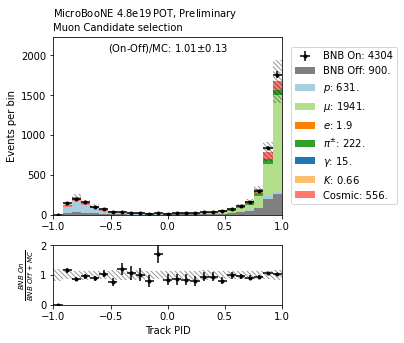

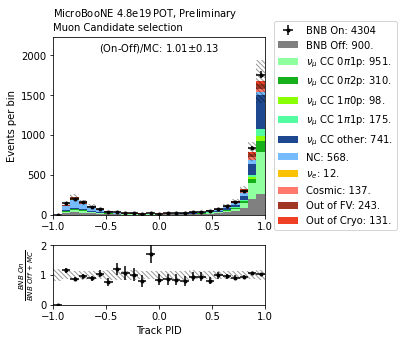

In [10]:
# Janets plot
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_considered & muon_candidate_no_pid",
    legend=True,
    title_str="Muon Candidate selection",
    kind="pdg",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "muon_candidate_pid_pdg.pdf", bbox_inches="tight")


fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_considered & muon_candidate_no_pid",
    legend=True,
    title_str="Muon Candidate selection",
    kind="cat",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "muon_candidate_pid_cat.pdf", bbox_inches="tight")

MC category: $p$: 740. 	#entries 92438
MC category: $\mu$: 162. 	#entries 18981
MC category: $e$: 0.96 	#entries 1263
MC category: $\pi^{\pm}$: 84. 	#entries 20017
MC category: $\gamma$: 9.6 	#entries 1503
MC category: $K$: 0.34 	#entries 69
MC category: Cosmic: 246. 	#entries 32417
Obtained ratio and purity from dict
MC category: $\nu_\mu$ CC 0$\pi$1p: 626. 	#entries 58026
MC category: $\nu_\mu$ CC 0$\pi$2p: 80. 	#entries 7669
MC category: $\nu_\mu$ CC 1$\pi$0p: 62. 	#entries 11310
MC category: $\nu_\mu$ CC 1$\pi$1p: 56. 	#entries 10594
MC category: $\nu_{\mu}$ CC other: 190. 	#entries 28639
MC category: NC: 93. 	#entries 35766
MC category: $\nu_e$: 2.3 	#entries 4929
MC category: Cosmic: 43. 	#entries 5756
MC category: Out of FV: 62. 	#entries 3655
MC category: Out of Cryo: 29. 	#entries 344
Obtained ratio and purity from dict


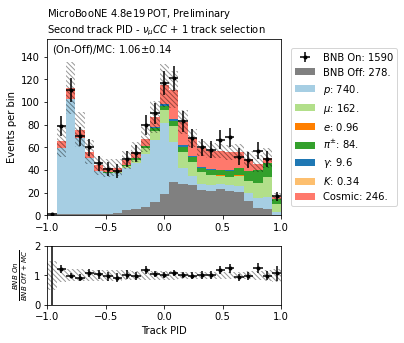

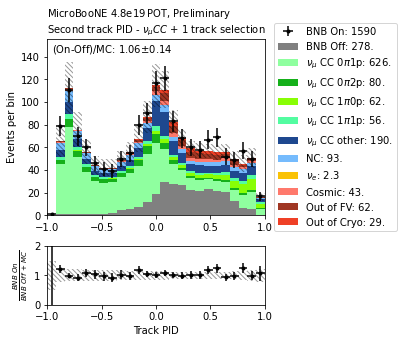

In [13]:
# second track
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==2",
    legend=True,
    title_str=r"Second track PID - $\nu_{\mu}CC$ + 1 track selection",
    kind="pdg",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "two_tracks_pid_pdg.pdf", bbox_inches="tight")

# second track
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==2",
    legend=True,
    title_str=r"Second track PID - $\nu_{\mu}CC$ + 1 track selection",
    kind="cat",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "two_tracks_pid_cat.pdf", bbox_inches="tight")

MC category: $p$: 216. 	#entries 27363
MC category: $\mu$: 40. 	#entries 7413
MC category: $e$: 0.71 	#entries 706
MC category: $\pi^{\pm}$: 76. 	#entries 15813
MC category: $\gamma$: 8.8 	#entries 1518
MC category: $K$: 0.073 	#entries 18
MC category: Cosmic: 71. 	#entries 12209
Calculating ratio and purity


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:469: RuntimeWarning: divide by zero encountered in true_divide
  3 / (1 / beam_on_bins + 2 / prediction),
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:491: RuntimeWarning: divide by zero encountered in double_scalars
  sc_err = e / v
/home/nic/.local/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  self._y1 = self._y0 + self._height
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:514: RuntimeWarning: invalid value encountered in true_divide
  y_min_r = max(0, min((beam_on_bins - err_on) / prediction) * 0.9)
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:515: RuntimeWarning: invalid value encountered in true_divide
  y_max_r = min(2, max((beam_on_bins + err_on) / prediction) * 1.1)
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python

MC category: $\nu_\mu$ CC 0$\pi$1p: 40. 	#entries 4384
MC category: $\nu_\mu$ CC 0$\pi$2p: 134. 	#entries 12415
MC category: $\nu_\mu$ CC 1$\pi$0p: 7.6 	#entries 1367
MC category: $\nu_\mu$ CC 1$\pi$1p: 78. 	#entries 15089
MC category: $\nu_{\mu}$ CC other: 1.0e+02 	#entries 16524
MC category: NC: 31. 	#entries 11018
MC category: $\nu_e$: 0.92 	#entries 2036
MC category: Cosmic: 10. 	#entries 1726
MC category: Out of FV: 7.0 	#entries 449
MC category: Out of Cryo: 2.8 	#entries 32
Obtained ratio and purity from dict


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:469: RuntimeWarning: divide by zero encountered in true_divide
  3 / (1 / beam_on_bins + 2 / prediction),
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:491: RuntimeWarning: divide by zero encountered in double_scalars
  sc_err = e / v
/home/nic/.local/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  self._y1 = self._y0 + self._height
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:514: RuntimeWarning: invalid value encountered in true_divide
  y_min_r = max(0, min((beam_on_bins - err_on) / prediction) * 0.9)
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:515: RuntimeWarning: invalid value encountered in true_divide
  y_max_r = min(2, max((beam_on_bins + err_on) / prediction) * 1.1)
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python

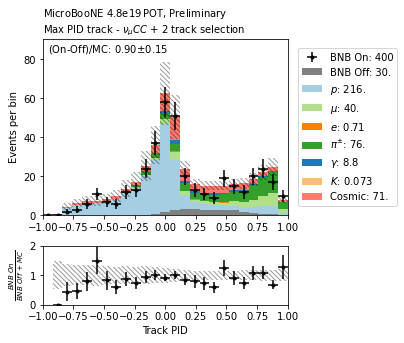

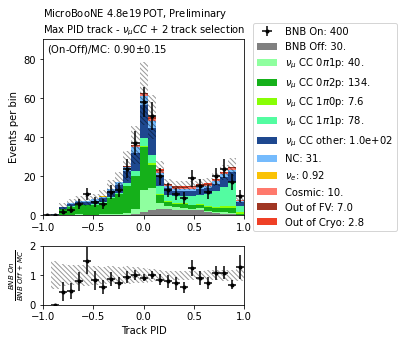

In [14]:
# second track
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==3",
    legend=True,
    title_str=r"Max PID track - $\nu_{\mu}CC$ + 2 track selection",
    kind="pdg",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "three_tracks_pid_pdg.pdf", bbox_inches="tight")

# second track
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==3",
    legend=True,
    title_str=r"Max PID track - $\nu_{\mu}CC$ + 2 track selection",
    kind="cat",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "three_tracks_pid_cat.pdf", bbox_inches="tight")